# Programmation d'un neurone artificiel

Formation deep learning de machine learnia (youtube). Etape 9.

Avec n le nombre de neurones dans la couche, n0 le nombre de variables d'entrées, m le nombre de données vues par le modèle
* X les données, une matrice (n0, m)
* y la cible, (1, m)

On suit le même principe que pour un seul neurone, sauf qu'on a cette fois 2 paramètres
* b1 : pour la couche 1, matrice (n1, n0)
* b1 : pour la couche 1, (n1, 1)
* b2 : pour la couche 2 (n2, n1)
* b2 : pour la couche 2 (n2, 1)

### Fonction d'initialisation pour les parametres W et b
### Algo iteratif :
#### Modele de neurone artificiel : Forward propagation avec fonction z et fonction a
* Z1 = W1.X+b1 matrice (n1, m)
* Z2 = W2.A1+b2 matrice (n2, m)
* A = sigmoide(Z) = 1/1-e-Z, mêmes dimensions que Z
#### Gradients de la fonction cout : Back propagation
* Fonction cout
* Gradients de la fonction cout : les dérivées ont la même dimension que leurs fonction d'origine
* * dZ2 = A2 - y 
  * dW2 = 1/m * dZ2 . A1.T
  * db2 = 1/m * somme(dZ2) sur l'axe 1
  * dZ1 = W2.T . dZ2 * A1 * (1-A1)
  * dW1 = 1/m * dZ1 . X.T
  * db1 = 1/m * somme(dZ1) sur l'axe 1 
* Update w et b (descente de gradients)
* * W1 = W1 - alpha*dW1
  * b1 = b1 - alpha*db1
  * W2 = W2 - alpha*dW2
  * b2 = b2 - alpha*db2

## Mise en place

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

In [4]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    W2 = np.random.randn(n2, n1)
    b1 = np.random.randn(n1, 1)
    b2 = np.random.randn(n2, 1)
    parametres = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
    return parametres

In [7]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    W2 = parametres['W2']
    b1 = parametres['b1']
    b2 = parametres['b2']
    
    Z1 = np.dot(W1, X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activations = {
        'A1' : A1,
        'A2' : A2
    }
    return activations

In [ ]:
def logloss(A, y):
    epsilon = 1e-15
    L = 1/len(y) * np.sum(-y*np.log(A + epsilon)-(1-y)*np.log(1-A +epsilon))
    return L

In [9]:
def back_propagation(X, y, parametres, activations):
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1/m*np.dot(dZ2, A1.T)
    db2 = 1/m*np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2)*A1*(1-A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)

    gradients = {
        'dW2' : dW2,
        'db2' : db2,
        'dW1' : dW1,
        'db1' : db1
    }
    return gradients

In [10]:
def update(parametres, gradients, alpha):
    W1 = parametres['W1']
    W2 = parametres['W2']
    b1 = parametres['b1']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']
    
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2

    new_parametres = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
    return new_parametres

In [35]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

## Assemblage du réseau de neurones

(100, 2)
(100, 1)


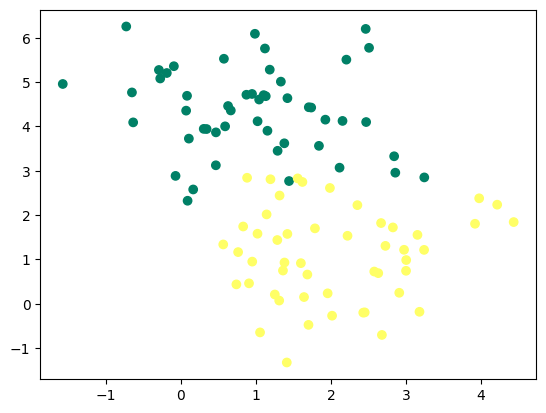

In [16]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
#X[:, 1] = X[:, 1] * 10
print(X.shape)
y = y.reshape((y.shape[0], 1))
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')
plt.show()

In [64]:
def neural_network(X_train, y_train, n1, learning_rate=0.1, n_iter=100):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    
    parametres = initialisation(n0, n1, n2)
    train_loss = []
    train_acc = []

    for e in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, parametres, activations)
        parametres = update(parametres, gradients, learning_rate)

        #Tous les multiples de 10, on calcule les métriques:
        if e%10 == 0:
                       
            train_loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
            y_pred_train = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred_train.flatten()))
            
            
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_acc, label='train accuracy')
    plt.legend()
    plt.show()
    
    return (activations, gradients, parametres, train_loss, train_acc)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 10189.01it/s]


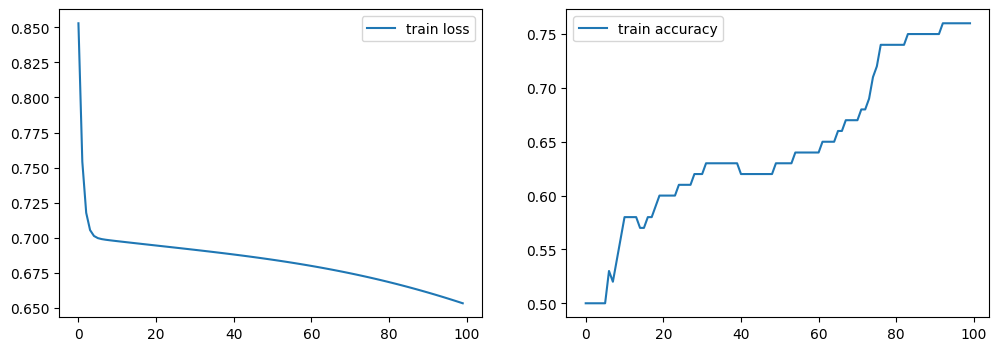

In [65]:
(activations, gradients, parametres, train_loss, train_acc) = neural_network(X.T, y.T, 3, learning_rate=0.1, n_iter=1000)

In [51]:
y_pred = predict(X.T, parametres)

In [63]:
print(activations['A2'].flatten().shape)
print(y.T.flatten().shape)

(100,)
(100,)


[[False  True False  True  True  True False  True  True  True  True  True
   True False False False False False  True False  True False False  True
   True  True False  True  True  True  True  True  True  True  True False
  False  True False  True False  True  True  True False False False  True
   True False  True  True False  True False  True False  True False  True
  False False False  True  True  True  True  True False  True False False
   True  True  True  True False  True  True  True False  True  True  True
   True False  True False  True False  True  True False  True False  True
   True  True  True  True]]


(100, 2)
(100, 1)


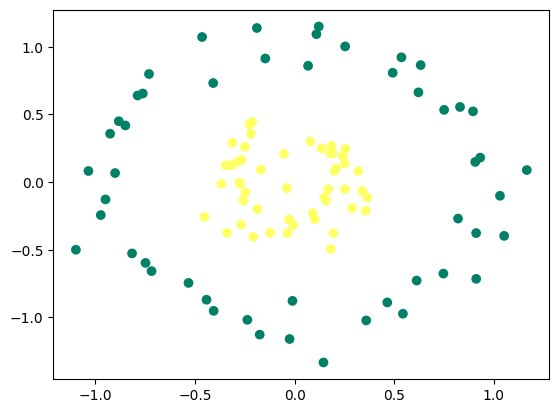

In [66]:
X, y = make_circles(n_samples=100, noise = 0.1, factor = 0.3, random_state = 0)
y = y.reshape((y.shape[0], 1))
print(X.shape)
print(y.shape)

plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')
plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 9007.28it/s]


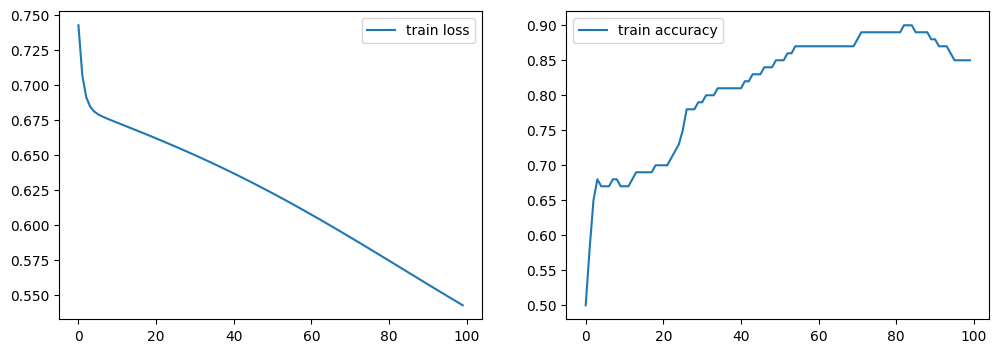

In [68]:
(activations, gradients, parametres, train_loss, train_acc) = neural_network(X.T, y.T, 2, learning_rate=0.1, n_iter=1000)

[[ 2.53504813 -2.82793609]]


ValueError: operands could not be broadcast together with shapes (1,2) (100,) 

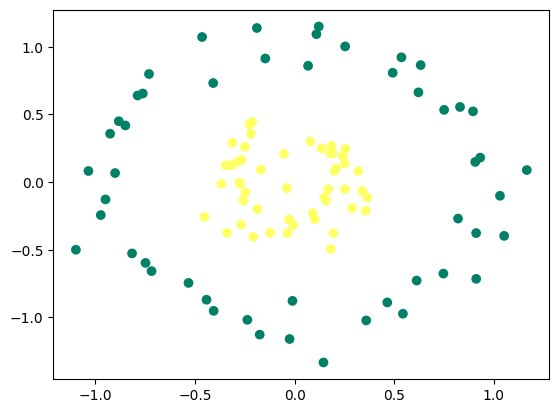

In [71]:
print(parametres['W2'])
plt.scatter(X[:, 0], X[:, 1], c = y, cmap='summer')

x1 = np.linspace(-1, 1, 100)
x2 = (- parametres['W2'] * x1.T - b)/parametres['b2']
plt.show()